## Project Goal

The goal of this project is to perform **RFM (Recency, Frequency, Monetary) analysis** to rank customers by value and engagement. By leveraging feature engineering, scoring techniques, and visualizations, the project aims to:

1. Analyze customer segmentation using RFM scores.
2. Identify top-tier customers for tailored marketing strategies.
3. Provide insights for improving customer retention and value.

## Libraries

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Mount Google Drive
drive.mount('/content/drive')

#Define the file path
file_path = '/content/drive/My Drive/marketing_campaign.csv'

#Load the dataset
df = pd.read_csv(file_path, delimiter='\t')
print(df.head())

Mounted at /content/drive
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  C

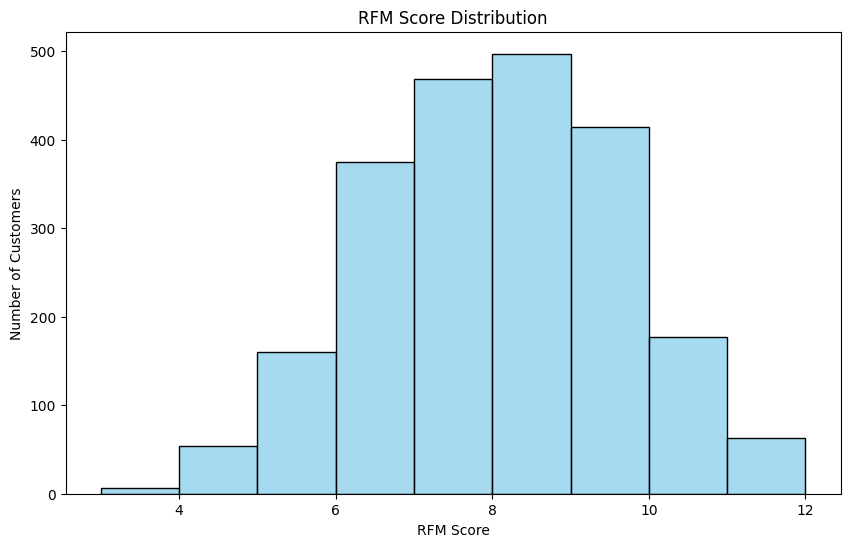

Number of Top-Tier Customers: 240


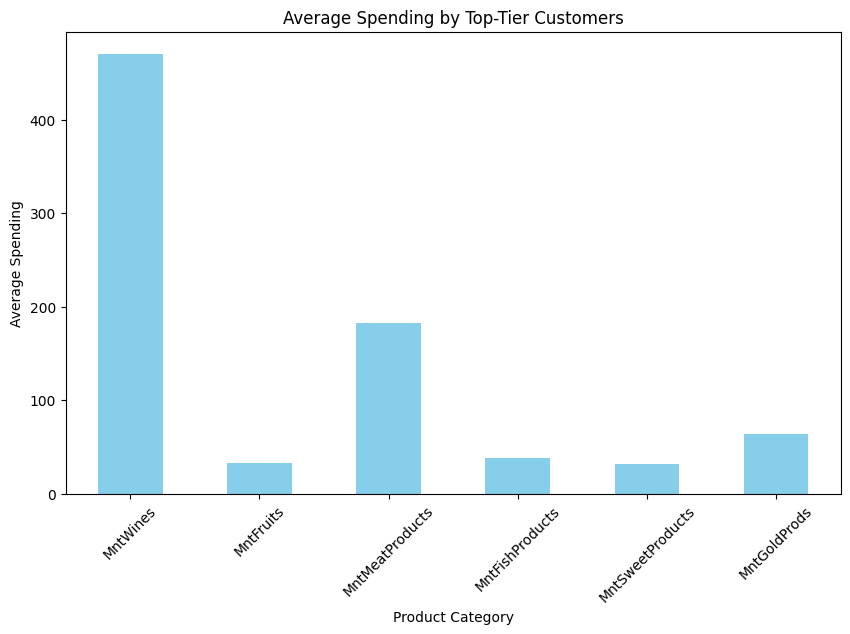

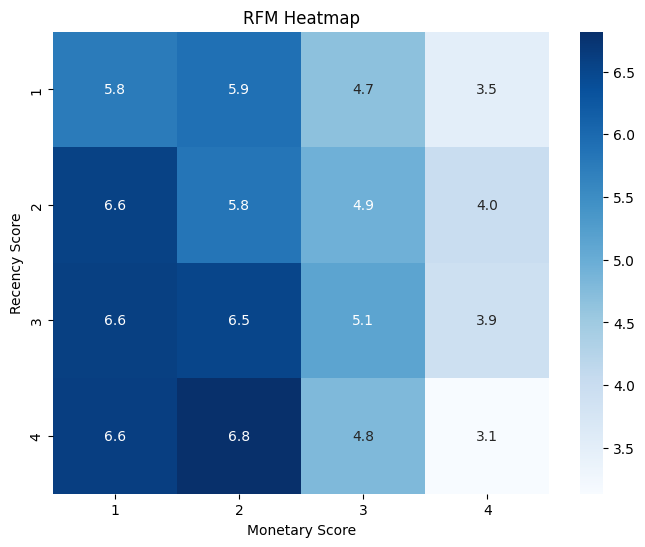

Top-tier customers exhibit higher spending in wines and meat products.
Target these customers with exclusive offers to increase retention.


In [4]:
# Data Preprocessing
required_columns = ['ID', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                    'MntGoldProds', 'NumWebVisitsMonth', 'Year_Birth']
df = df[required_columns].dropna()

# Feature Engineering
# Calculate Monetary (Total spending), Frequency (sum of purchases), and Recency (inverse of web visits)
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Frequency'] = df['NumWebVisitsMonth']
df['Recency'] = 2024 - df['Year_Birth']  # Assuming the dataset is for the year 2024

# Create RFM scores
# Recency: Lower values are better (recent)
df['R_Score'] = pd.qcut(df['Recency'], q=4, labels=[4, 3, 2, 1]).astype(int)
# Frequency: Higher values are better
df['F_Score'] = pd.qcut(df['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4]).astype(int)
# Monetary: Higher values are better
df['M_Score'] = pd.qcut(df['Monetary'], q=4, labels=[1, 2, 3, 4]).astype(int)

# Calculate overall RFM score
df['RFM_Score'] = df['R_Score'] + df['F_Score'] + df['M_Score']

# Visualize RFM Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['RFM_Score'], bins=range(3, 13), kde=False, color='skyblue')
plt.title('RFM Score Distribution')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.show()

# Analyze Top-Tier Customers
# Define top-tier customers as those with RFM score >= 10
top_tier_customers = df[df['RFM_Score'] >= 10]
print(f"Number of Top-Tier Customers: {len(top_tier_customers)}")

# Visualize spending patterns of top-tier customers
plt.figure(figsize=(10, 6))
top_tier_customers[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().plot(kind='bar', color='skyblue')
plt.title('Average Spending by Top-Tier Customers')
plt.xlabel('Product Category')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

# Generate Heatmap for RFM Segments
rfm_pivot = df.pivot_table(index='R_Score', columns='M_Score', values='Frequency', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_pivot, annot=True, fmt=".1f", cmap="Blues")
plt.title('RFM Heatmap')
plt.xlabel('Monetary Score')
plt.ylabel('Recency Score')
plt.show()

# Insights
print("Top-tier customers exhibit higher spending in wines and meat products.")
print("Target these customers with exclusive offers to increase retention.")


## Interpretation and Business Insights

### Key Observations:
1. **RFM Score Distribution**:
   - The majority of customers fall within the mid-range of RFM scores (6–9).
   - Customers with higher RFM scores (≥10) represent a smaller segment but are likely the most valuable.

2. **Spending Patterns of Top-Tier Customers**:
   - Top-tier customers exhibit significantly higher spending on wines, followed by meat products.
   - Other product categories like gold products and sweets have moderate spending, whereas fruits and fish products are less prioritized.

3. **RFM Heatmap Insights**:
   - Customers with high recency scores (i.e., lower recency values) and high monetary scores demonstrate frequent engagement.
   - Conversely, customers with low recency and low monetary scores show less frequent activity.

### Business Insights:
1. **Targeted Marketing for Top-Tier Customers**:
   - Focus marketing campaigns on top-tier customers with exclusive offers or loyalty programs to retain high-value customers.
   - Promote premium wine and meat products, as these are their primary interests.

2. **Engagement Strategies for Mid-Tier Customers**:
   - For customers in the mid-range RFM scores, implement campaigns that encourage higher spending or more frequent purchases, such as discounts or bundle offers.

3. **Reactivation Campaigns**:
   - For customers with low recency scores, re-engage them with targeted promotions or personalized recommendations to bring them back into the purchase cycle.

4. **Personalization Opportunities**:
   - Use insights from product category preferences to tailor email marketing or targeted ads to individual customer segments.
   - Highlight wines and meat products in marketing materials for top-tier customers while experimenting with upselling other categories.

By leveraging these insights, the business can prioritize customer engagement and maximize revenue through targeted and data-driven strategies.
